<a href="https://colab.research.google.com/github/stmulugheta/20223-ML-DL-models/blob/master/AirQualityMilan_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Air Quality Milan

####

Author: Maria Fisher 



| Air Quality Index (AQI) |Air Pollution Level|Health Implications|
|:--:|:--:|:--:|
|0 - 50|Good| Air quality is considered satisfactory, and air pollution poses little or no risk|
|51 -100|Moderate| Air quality is acceptable; however, for some pollutants there may be a moderate health concern for a very small number of people who are unusually sensitive to air pollution|
|101-150|Unhealthy for Sensitive Groups|Members of sensitive groups may experience health effects. The general public is not likely to be affected|
|151-200|Unhealthy| Everyone may begin to experience health effects; members of sensitive groups may experience more serious health effects|
|201-300|Very Unhealthy| Health warnings of emergency conditions. The entire population is more likely to be affected|
|301+|Hazardous| Health alert: everyone may experience more serious health effects||




[image.png](attachme[link text](https://)nt:image.png)

Souce: Sarmadi et al. (2021)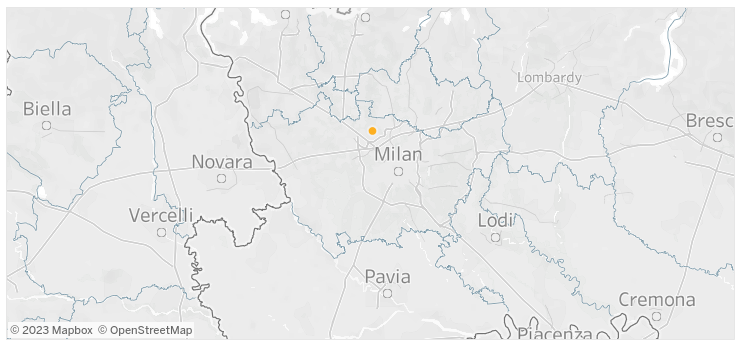

In [3]:
!pip install pandas
!pip install panel
!pip install hvplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 34.6 MB/s eta 0:00:00


In [4]:
#Importing packages
import pandas as pd
import numpy as np
import panel as pn
pn.extension('tabulator')

import hvplot.pandas

In [5]:
# Cache data to improve dashboard performance
if 'data' not in pn.state.cache.keys():

    df = pd.read_csv('air_dataset2.csv')

    pn.state.cache['data'] = df.copy()

else: 

    df = pn.state.cache['data']

# Filling all empty cells with 0
df=df.fillna(0)

df

,Raw name,Year,City,NO2 average,NO2 traffic,NO2 background,NO2 exceedances,PM10 average,PM10 traffic,PM10 background,...,Bike Sharing: users/1000 inhabitants,road accidents/1000 inhabitants,fatal road accidents/1000 inhabitants,Taxi licenses,licenses for rental with driver,MODAL SPLIT % car,MODAL SPLIT % motorbike,MODAL SPLIT % public transport,MODAL SPLIT % bike,MODAL SPLIT % walk
0,Bari 2006,2006,Bari,45.1,45.1,0.0,7.0,35.2,35.2,0.0,...,0.0,0.0,0.0,150.0,26.0,0.0,0.0,0.0,0.0,0.0
1,Bari 2007,2007,Bari,35.5,35.5,0.0,0.0,34.2,34.2,0.0,...,0.0,0.0,0.0,150.0,26.0,0.0,0.0,0.0,0.0,0.0
2,Bari 2008,2008,Bari,30.6,30.6,0.0,0.0,32.6,32.6,0.0,...,600.0,0.0,0.0,150.0,26.0,0.0,0.0,0.0,0.0,0.0
3,Bari 2009,2009,Bari,31.6,33.0,27.3,0.0,24.0,20.6,16.1,...,1000.0,7.7,0.5,150.0,25.0,0.0,0.0,0.0,0.0,0.0
4,Bari 2010,2010,Bari,32.0,34.2,25.3,0.0,23.5,21.1,21.1,...,1050.0,6.8,0.5,150.0,25.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,Venice 2012,2012,Venice,32.5,0.0,32.5,0.0,43.2,51.1,35.3,...,3.4,4.0,0.9,356.0,191.0,0.0,0.0,0.0,0.0,0.0
150,Venice 2013,2013,Venice,30.6,0.0,30.6,0.0,32.8,35.0,30.7,...,2.2,3.8,0.5,364.0,194.0,0.0,0.0,0.0,0.0,0.0
151,Venice 2014,2014,Venice,28.4,0.0,28.4,0.0,29.1,30.1,28.1,...,1.6,4.1,0.6,369.0,213.0,0.0,0.0,0.0,0.0,0.0
152,Venice 2015,2015,Venice,37.2,40.0,34.4,0.0,37.6,40.1,35.1,...,1.3,3.9,1.2,369.0,232.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df.City.unique()

array(['Bari', 'Bologna', 'Cagliari', 'Catania', 'Florence', 'Genoa',
       'Messina', 'Milan', 'Neaples', 'Palermo', 'Reggio Calabria',
       'Rome', 'Turin', 'Venice'], dtype=object)

In [7]:
df.columns

Index(['Raw name', 'Year', 'City', 'NO2 average', 'NO2 traffic',
       'NO2 background', 'NO2 exceedances', 'PM10 average', 'PM10 traffic',
       'PM10 background', 'PM10 exceedances', 'PM2.5 average', 'PM2.5 traffic',
       'PM2.5 background', 'Population density (inhabitants per km2)',
       'Surface (km2)',
       'public transport offer filobus (places-km/inhabitants)',
       'public transport offer tram (places-km/inhabitants)',
       'public transport offer subway (places-km/inhabitants)',
       'public transport offer funicolare (places-km/inhabitants)',
       'public transport offer trasporti via aqua (places-km/inhabitants)',
       'Public transport demand (passengers/inhabitants) ',
       'Motorization rate (vehicles/1000inhabitants)',
       'Autovehicles density (vehicles/km2)',
       'Motorization rate (motorbikes /1000 inhabitants)',
       'autovehicles Euro 0', 'autovehicles Euro 1', 'autovehicles Euro 2',
       'autovehicles Euro 3', 'autovehicles Euro 4', 

In [8]:
# Creating an interactive dataframe
idf=df.interactive()


In [9]:
max_year = df['Year'].max()
min_year = df['Year'].min()

print('Years present in this dataset range from ' + str(min_year) + ' to ' + str(max_year))

Years present in this dataset range from 2006 to 2016


In [10]:
# Year slider widget
year_slider = pn.widgets.IntSlider(name='Year', start=2006, end=2016, step=1, value=2010, bar_color='grey')
year_slider



IntSlider(bar_color='grey', end=2016, name='Year', start=2006, value=2010)

In [11]:
# Emissions widgets
yaxis_emissions = pn.widgets.RadioButtonGroup(
    name='Y axis', 
    options=['NO2 average', 'PM2.5 average','PM10 average'],
    button_type='success'
)



In [12]:

cities = ['Bari', 'Bologna', 'Cagliari', 'Catania', 'Florence', 'Genoa','Messina', 'Milan', 'Neaples', 'Palermo', 'Reggio Calabria',
       'Rome', 'Turin', 'Venice']

# Define data pipeline
emissions_pipeline = (
    idf[
        (idf.Year <= year_slider) &
        (idf.City.isin(cities))
    ]
    .groupby(['City', 'Year'])[yaxis_emissions].mean()
    .to_frame()
    .reset_index()
    .sort_values(by='Year', ascending=False)
    .reset_index(drop=True)
)



In [13]:
emissions_table = emissions_pipeline.pipe(pn.widgets.Tabulator, pagination='remote', page_size = 10, sizing_mode='stretch_width') 
emissions_table

In [14]:


emissions_plot = emissions_pipeline.hvplot(x = 'Year', by='City', y=yaxis_emissions,line_width=2, title="Emission by City")
emissions_plot



### Emissions by City

In [15]:

yaxis_emissions_source = pn.widgets.RadioButtonGroup(
    name='Y axis', 
    options=[
       'Total autovehicles','Totale motorbikes', 'Petrol cars', 'Wheel public transport (km)',
       'Rail public transport (km)'],
    button_type='success'
)

cities_italy = ['Bari', 'Bologna', 'Cagliari', 'Catania', 'Florence', 'Genoa','Messina', 'Milan', 'Neaples', 'Palermo', 'Reggio Calabria',
       'Rome', 'Turin', 'Venice']

emissions_source_bar_pipeline = (
    idf[
        (idf.Year == year_slider) &
        (idf.City.isin(cities_italy))
    ]
    .groupby(['Year', 'City'])[yaxis_emissions_source].mean()
    .to_frame()
    .reset_index()
    .sort_values(by='Year')  
    .reset_index(drop=True)
)



In [19]:

emissions_source_bar = emissions_source_bar_pipeline.hvplot(kind='bar', 
                                                     x='City', 
                                                     y=yaxis_emissions_source, 
                                                     title='Emissions source by City',
                                                    color='#4099da')
emissions_source_bar



### Creating and Launching Dashboard

In [23]:

# Creating the dashboard
template = pn.template.FastListTemplate(
    title='Emissions in Italy', accent="#4099da",
    sidebar=[pn.pane.Markdown("# Emissions in Italy"), 
             pn.pane.Markdown("#### Author: Maria Fisher"),
             pn.pane.Markdown("#### Demo - NO2, PM2.5 and PM10 emissions from 2006 to 2016 in Italy."), 
             pn.pane.PNG('Milan_map.png', sizing_mode='scale_both'),
             pn.pane.Markdown("## Year Slider"),   
             year_slider],
    main=[pn.Row(pn.Column(yaxis_emissions, 
            emissions_plot.panel(width=700), margin=(0,25)), 
            emissions_table.panel(width=500)), 
            pn.Column(yaxis_emissions_source, emissions_source_bar.panel(width=600))],
        
    accent_base_color="#4099da",
    header_background="#4099da",
)
# template.show()
template.servable();

In [20]:
# to open the dashboard tipe the following command into the terminal : panel serve AirQualityMilan.ipynb


#### References

Sarmadi, M., Rahimi, S., Rezaei, M. et al. Air quality index variation before and after the onset of COVID-19 pandemic: a comprehensive study on 87 capital, industrial and polluted cities of the world. Environ Sci Eur 33, 134 (2021). https://doi.org/10.1186/s12302-021-00575-y